In [1]:
%matplotlib inline
import bioscrape as bs
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model

import numpy as np
import pylab as plt
import pandas as pd
species = ['I','X', 'Y']
reactions = [(['X'], [], 'massaction', {'k':'d1'}), 
             ([], ['X'], 'hillpositive', {'s1':'I', 'k':'k1', 'K':'KR', 'n':2}),
             (['X'],['Y'],'massaction', {'k':'k2'})]
k1 = 50.0
d1 = 0.5
k2 = 10
params = [('k1', k1), ('d1', d1), ('KR', 20), ('k2',k2)]
initial_condition = {'X':0, 'I':0}
M = Model(species = species, reactions = reactions, parameters = params, 
          initial_condition_dict = initial_condition)

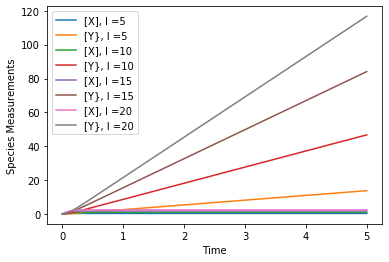

In [2]:
num_trajectories = 4 # each with different initial condition
initial_condition_list = [{'I':5},{'I':10},{'I':15},{'I':20}] 
timepoints = np.linspace(0,5,100)
result_list = []
for init_cond in initial_condition_list:
    M.set_species(init_cond)
    result = py_simulate_model(timepoints, Model = M)
    result_list.append(result)
    plt.plot(timepoints, result['X'], label = '[X], I =' + str(list(init_cond.values())[0]))
    plt.plot(timepoints, result['Y'], label = '[Y}, I =' + str(list(init_cond.values())[0]))
plt.xlabel('Time')
plt.ylabel('Species Measurements')
plt.legend()
plt.show()

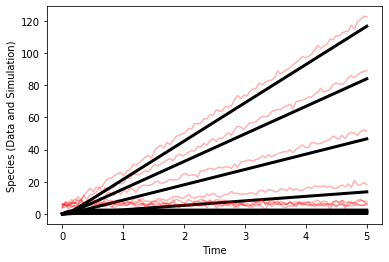

In [3]:

exp_data = pd.DataFrame()
exp_data['timepoints'] = timepoints
for i in range(num_trajectories):
    exp_data['X' + str(i)] = result_list[i]['X'] + np.random.normal(5, 1, size = np.shape(result['X']))
    exp_data['Y' + str(i)] = result_list[i]['Y'] + np.random.normal(5, 1, size = np.shape(result['Y']))
    plt.plot(timepoints, exp_data['X' + str(i)], 'r', alpha = 0.3)
    plt.plot(timepoints, exp_data['Y' + str(i)], 'r', alpha = 0.3)
    plt.plot(timepoints, result_list[i]['X'], 'k', linewidth = 3)
    plt.plot(timepoints, result_list[i]['Y'], 'k', linewidth = 3)
plt.xlabel('Time')
plt.ylabel('Species (Data and Simulation)')
plt.show()


In [4]:
exp_data.to_csv('../data/multiple_measurements.csv')
exp_data

,timepoints,X0,Y0,X1,Y1,X2,Y2,X3,Y3
0,0.000000,5.626394,3.855386,4.270308,6.104964,4.904133,6.206528,6.276209,3.811050
1,0.050505,5.435905,4.329058,7.561395,5.921139,5.701070,5.098220,6.293710,7.461520
2,0.101010,5.433247,5.664078,5.220359,3.048985,5.472135,4.415650,7.560135,6.232932
3,0.151515,5.556730,4.260118,6.671152,4.587617,8.928707,6.719209,6.235887,7.182302
4,0.202020,4.240168,5.420932,6.772310,4.941552,6.795662,9.264862,6.615861,6.623406
5,0.252525,3.865796,5.031941,6.321071,5.308672,6.180995,8.156572,7.671500,10.739117
6,0.303030,4.758637,5.377232,5.470446,8.944653,7.430723,7.844519,8.798402,8.961583
7,0.353535,6.358161,6.178514,6.269472,6.856141,6.887064,11.406845,6.249047,11.654893
8,0.404040,6.570976,5.085222,6.541566,8.038284,6.861748,9.190386,7.351478,13.777612
9,0.454545,5.682223,6.910720,6.122998,8.716950,7.597521,11.814047,8.116950,15.884080


In [5]:
exp_data = []
for i in range(num_trajectories):
    df = pd.read_csv('../data/multiple_measurements.csv', usecols = ['timepoints', 'X'+str(i),'Y'+str(i)])
    df.columns = ['timepoints', 'X', 'Y']
    exp_data.append(df)

100%|██████████████████████████████████████████████████████████████████████████████| 4000/4000 [18:56<00:00,  5.32it/s]


Successfully completed MCMC parameter identification procedure. Parameter distribution data written to mcmc_results.csv file. Check the MCMC diagnostics to evaluate convergence.
{'Autocorrelation time for each parameter': array([71.57220919, 57.54490881, 58.78295889, 60.75396391]), 'Acceptance fraction (fraction of steps that were accepted)': array([0.541  , 0.531  , 0.51675, 0.548  , 0.5135 , 0.54225, 0.52825,
       0.5295 , 0.53625, 0.521  , 0.5525 , 0.519  , 0.52475, 0.534  ,
       0.5185 , 0.52325, 0.53975, 0.52025, 0.53625, 0.5205 , 0.53475,
       0.51975, 0.508  , 0.5435 , 0.51825, 0.554  , 0.53125, 0.54275,
       0.54075, 0.5285 , 0.55375, 0.551  , 0.53875, 0.3095 , 0.5525 ,
       0.553  , 0.52075, 0.53125, 0.56825, 0.5385 , 0.5435 , 0.53475,
       0.51225, 0.544  , 0.51025, 0.54   , 0.5555 , 0.5375 , 0.53975,
       0.55175, 0.5255 , 0.54525, 0.5345 , 0.55375, 0.534  , 0.5105 ,
       0.52525, 0.54575, 0.51525, 0.53225, 0.53975, 0.527  , 0.516  ,
       0.545  , 0.54475, 

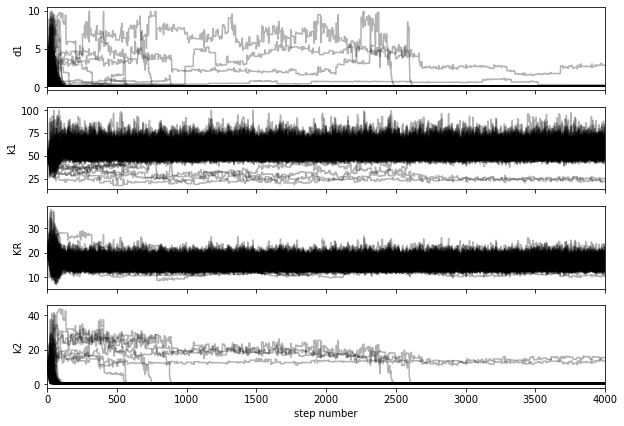

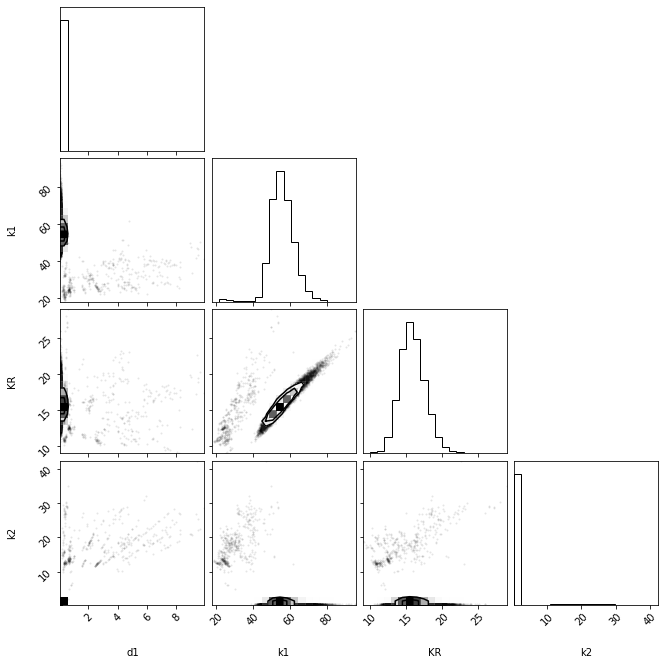

In [6]:
from bioscrape.inference import py_inference
prior = {'d1' : ['uniform', 0.1, 10], 'k1' : ['uniform',0,100], 'KR' : ['uniform',0,100], 'k2':['uniform', 0, 100]}

sampler, pid = py_inference(Model = M, exp_data = exp_data, measurements = ['X','Y'], time_column = ['timepoints'],
                            initial_conditions = initial_condition_list,
                            nwalkers = 200, init_seed = 0.15, nsteps = 4000, sim_type = 'deterministic',
                            params_to_estimate = ['d1','k1','KR', 'k2'], prior = prior, convergence_check = True)


Parameter posterior distribution convergence plots:


([0.10506839269016749,
  55.44622460125905,
  15.742736261944907,
  0.4351050096675038],
 [array([0.00382208, 0.00876181]),
  array([5.33087252, 6.53053638]),
  array([1.59797232, 1.82965916]),
  array([0.01873925, 0.02039733])])

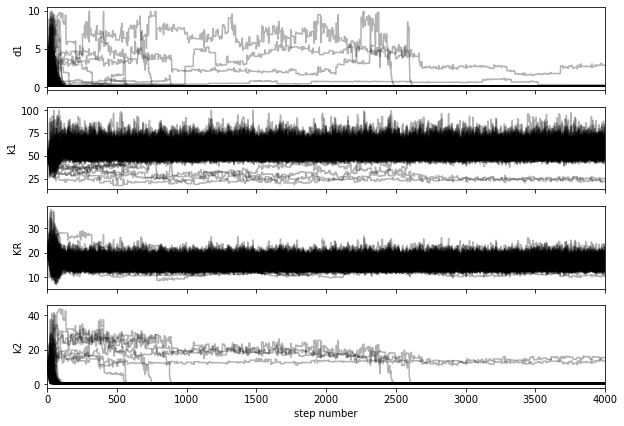

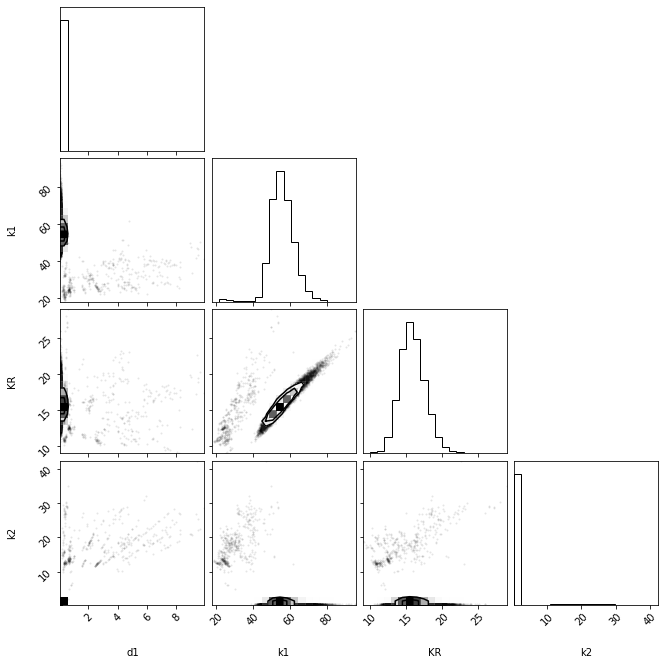

In [8]:
pid.plot_mcmc_results(sampler, convergence_check = True)